In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#from the above discription of Columns :
#inputs are [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]
#output is [MEDV]

In [3]:
# to load dataset
df=pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# here medv is a output variable.& the value is in contineous numeric value.So, here we use regression algo method.

In [5]:
# to show the no. of rows and no. columns
df.shape

(506, 14)

In [6]:
# to check null values in the given dataset
df.isnull().sum()
# here there is no null value in any column.

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

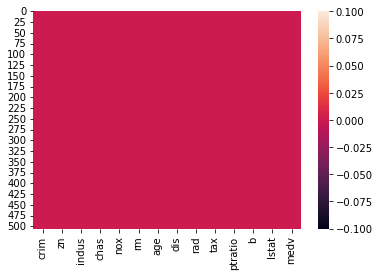

In [7]:
# to check null values in given dataset in visualize form.
sb.heatmap(df.isnull())
plt.show()

In [8]:
# we have to crosscheck is any null value in our dataset checking their dtypes
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [9]:
#check the duplicated value if there then drop it
df.duplicated().sum()

0

In [10]:
# to show any ramdomly 10 values
df.sample(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
112,0.12329,0.0,10.01,0,0.547,5.913,92.9,2.3534,6,432,17.8,394.95,16.21,18.8
458,7.75223,0.0,18.10,0,0.713,6.301,83.7,2.7831,24,666,20.2,272.21,16.23,14.9
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80,16.6
258,0.66351,20.0,3.97,0,0.647,7.333,100.0,1.8946,5,264,13.0,383.29,7.79,36.0
156,2.44668,0.0,19.58,0,0.871,5.272,94.0,1.7364,5,403,14.7,88.63,16.14,13.1
159,1.42502,0.0,19.58,0,0.871,6.510,100.0,1.7659,5,403,14.7,364.31,7.39,23.3
127,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,392.11,17.19,16.2
209,0.43571,0.0,10.59,1,0.489,5.344,100.0,3.8750,4,277,18.6,396.90,23.09,20.0
65,0.03584,80.0,3.37,0,0.398,6.290,17.8,6.6115,4,337,16.1,396.90,4.67,23.5
187,0.07875,45.0,3.44,0,0.437,6.782,41.1,3.7886,5,398,15.2,393.87,6.68,32.0


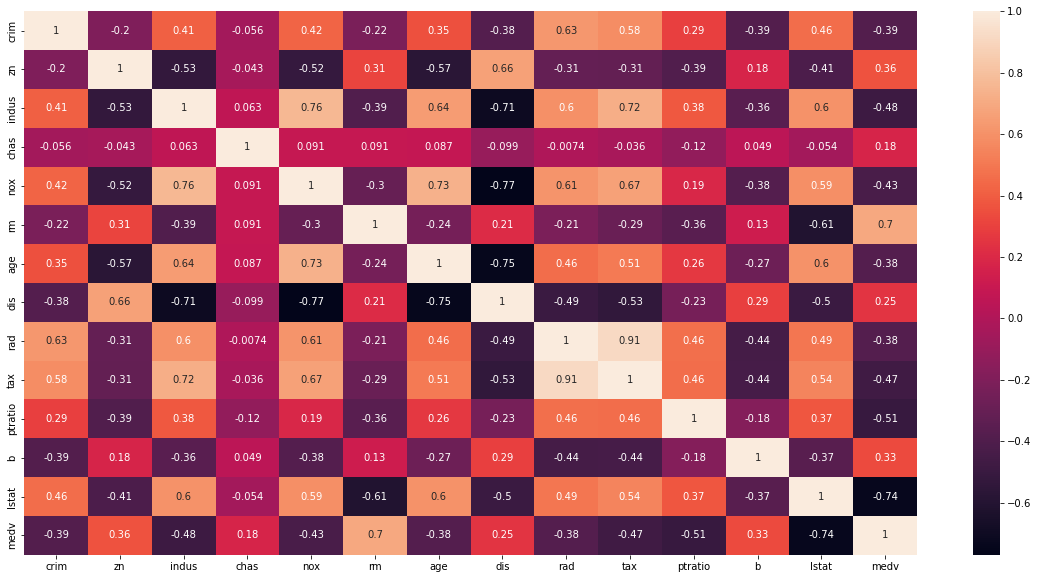

In [11]:
# to check co-realtion between input and output-variable
plt.figure(figsize=(20,10))
sb.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
#from the above discription of Columns :
#inputs are [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]
#output is [MEDV]

In [13]:
#those input relation is below 0.5 that column removes.
# feature selection:
# take input : indus,rm,ptration,lstat,tax
col=df[['crim','zn','chas','nox','age','dis','rad','b']]
# select those column whose drop from given dataset df
df.drop(col,axis=1,inplace=True)
df.head()
# this table is after removing column

,indus,rm,tax,ptratio,lstat,medv
0,2.31,6.575,296,15.3,4.98,24.0
1,7.07,6.421,242,17.8,9.14,21.6
2,7.07,7.185,242,17.8,4.03,34.7
3,2.18,6.998,222,18.7,2.94,33.4
4,2.18,7.147,222,18.7,5.33,36.2


<function matplotlib.pyplot.show(close=None, block=None)>

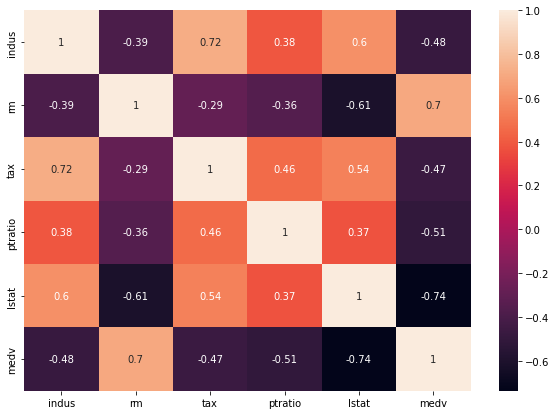

In [14]:
# now check the relation between input to input
plt.figure(figsize=(10,7))  #to increase the size of table.
sb.heatmap(df.corr(),annot=True)
plt.show

In [15]:
# take input lstat
# remove input indus, rm, tax,ptratio
x=df[['lstat']] # input
y=df['medv']  #output


In [16]:
x

,lstat
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
...,...
501,9.67
502,9.08
503,5.64
504,6.48


In [17]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
    

In [18]:
x_train.shape,x_test.shape

((354, 1), (152, 1))

In [19]:
# apply standard scaler on input X_train and X_test
from sklearn.preprocessing import StandardScaler
# create object of StandardScaler class
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [20]:
from sklearn.linear_model import LinearRegression
#create object of LinearRegression class 
lr=LinearRegression()

In [21]:
#train the model with 70% data
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
#chcek slope and intercept
m=lr.coef_
print("slope:",m)
c=lr.intercept_
print("intercept:",c)

slope: [-6.66258272]
intercept: 22.339830508474574


In [23]:
#test the 30% of data using predict method
y_pred=lr.predict(x_test)#y_pred=m1*x1+=m2*x2+=m3*x3+c
y_pred

array([27.31914909, 27.63999115, 16.98803475, 26.79663488, 24.88074943,
       24.02822625, 29.91338632, 22.26817837, 17.79472336, 26.14578384,
       27.12664386, 29.99588857, 21.74566416, 24.83491485, 23.47821128,
       23.10236773, 12.91792404, 29.97755474, 27.41081825,  7.15193387,
       23.67988344, 18.95892169, 25.71493879, 28.61168425, 29.94088707,
       11.8637287 , 15.57632968, 24.56907429, 27.56665583, 15.10881697,
       29.18919996, 17.29970989, 31.58176504, 19.15142693, 25.8891102 ,
       21.76399799, 17.91389327, 29.33587062, 12.82625488, 20.48979666,
       27.4933205 , 28.03416854, 27.25498068, 12.12956926, 17.69388728,
       13.37626984, 32.46178898, 19.23392917, 25.22909224, 24.47740513,
       23.53321278, 23.93655709, 29.44587361, 24.04656008,  7.01443013,
       28.05250237,  6.74858956, 28.74002108, 20.77397106, 30.60090503,
       20.453129  , 28.23584069, 15.96134016, 18.05139701,  7.13360004,
       29.60171118, 31.9576086 , 26.2924545 , 24.6882442 , 23.55

In [24]:
#find MSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
#mse =sum(ao-po)^2/no. of datapoints
print("mean_squared_error:" ,mse)

mean_squared_error: 42.62024347153971


In [25]:
#root mean squared error=sqrt(MSE)
mse=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(mse)
print(RMSE)

6.528418144661057


In [26]:
#FIND r2-score TO THE CHECK THE MODEL IS WORKING GOOD OR NOT
from sklearn.metrics import r2_score
print("R2-Score:",r2_score(y_test,y_pred))
#it is good becuase it is not nearest to 1 , it is giving 53% accuracy for input.means it is low score and MSE is also low

R2-Score: 0.5349901044757204


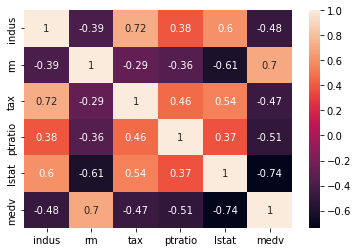

In [27]:
#multicolinearity condition : it means if one input is correlated with other input means multicolinearity occurs
#check the correlation
sb.heatmap(df.corr(),annot=True)
plt.show()


In [28]:
#check linear relation between inputs() and output()
#use some tricks
#Residual =(actual output-predicted output)
residual=y_test-y_pred
#print(residual)

In [29]:
dict={"y_pred":y_pred,"residual":residual}
df2=pd.DataFrame(dict)
df2.head()

,y_pred,residual
307,27.319149,0.880851
343,27.639991,-3.739991
47,16.988035,-0.388035
67,26.796635,-4.796635
362,24.880749,-4.080749


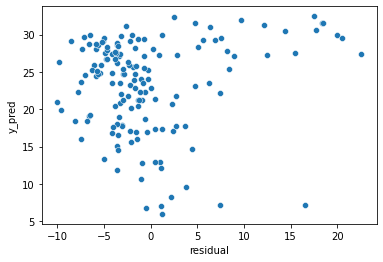

In [30]:
#visualize scatterplot between y_pred and residual
#residual is denpend on y_pred
#input:residual
#output: y_pred
sb.scatterplot(data=df2,x="residual",y="y_pred")
plt.show()

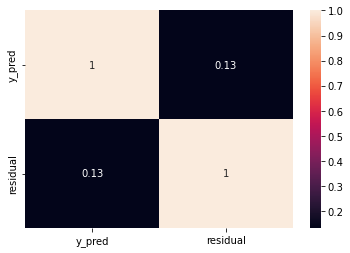

In [31]:
sb.heatmap(df2.corr(),annot=True)
plt.show() 

1.5766932256272943


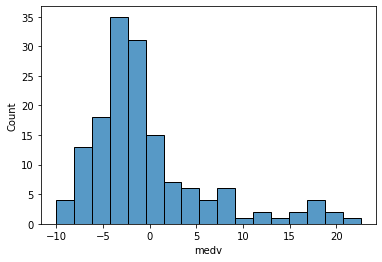

In [32]:
sb.histplot(residual)
print(residual.skew())

In [33]:
# 2nd assuption is not satisfied so as 3rd assupmtion
# so we are going for polynomial 


In [34]:
#polynomial linear regression(PLR):- when fail more than 2 assumption thyen go for PLR 
#We increase the degree of inputs
df.head()

,indus,rm,tax,ptratio,lstat,medv
0,2.31,6.575,296,15.3,4.98,24.0
1,7.07,6.421,242,17.8,9.14,21.6
2,7.07,7.185,242,17.8,4.03,34.7
3,2.18,6.998,222,18.7,2.94,33.4
4,2.18,7.147,222,18.7,5.33,36.2


In [35]:
#select input  and output from dataset
x=df[["lstat"]]# 2D 
y=df["medv"]#1D

In [36]:
#increase the degree of input  variables
#take degree of input= 2
#call PolynomialFeatures inbuilt class
from sklearn.preprocessing import PolynomialFeatures


In [37]:
#create the object of PolinomialFeatures class and give degree of input
#pf=PolynomialFeatures(2)#parameterise constructor
#pf=PolynomialFeatures(3)
#pf=PolynomialFeatures(4)
pf=PolynomialFeatures(5)

In [38]:
x_poly=pf.fit_transform(x)

In [39]:
x_poly

array([[1.00000000e+00, 4.98000000e+00, 2.48004000e+01, 1.23505992e+02,
        6.15059840e+02, 3.06299800e+03],
       [1.00000000e+00, 9.14000000e+00, 8.35396000e+01, 7.63551944e+02,
        6.97886477e+03, 6.37868240e+04],
       [1.00000000e+00, 4.03000000e+00, 1.62409000e+01, 6.54508270e+01,
        2.63766833e+02, 1.06298034e+03],
       ...,
       [1.00000000e+00, 5.64000000e+00, 3.18096000e+01, 1.79406144e+02,
        1.01185065e+03, 5.70683768e+03],
       [1.00000000e+00, 6.48000000e+00, 4.19904000e+01, 2.72097792e+02,
        1.76319369e+03, 1.14254951e+04],
       [1.00000000e+00, 7.88000000e+00, 6.20944000e+01, 4.89303872e+02,
        3.85571451e+03, 3.03830303e+04]])

In [40]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=1)

In [41]:
#create object of LinearRegression class 
lr=LinearRegression()

In [42]:
#train the model with 70% data
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
#test the 30% of data using predict method
y_pred=lr.predict(x_test)#y_pred=m1*x1+=m2*x2+c
y_pred

array([25.3263864 , 25.98557395, 16.1329319 , 24.39605855, 22.07898291,
       21.38936213, 33.33835478, 20.2144907 , 16.86412952, 23.44551176,
       24.96418321, 33.71836178, 19.8795868 , 22.03826124, 21.00075943,
       20.75033043, 12.5900566 , 33.63308542, 25.50741963, 11.40116079,
       21.13958243, 17.86126141, 22.91962529, 28.47958314, 33.46395936,
       11.91959685, 14.82429759, 21.81115464, 25.82848128, 14.39679608,
       30.38929097, 16.4182963 , 43.14957062, 18.01769464, 23.12349986,
       19.89143952, 16.96979556, 30.93357733, 12.52537597, 19.03185783,
       25.67526611, 26.90035362, 25.20299486, 12.07270748, 16.77417795,
       12.92944736, 50.49530864, 18.08393604, 22.40550494, 21.73615655,
       21.03826187, 21.32222919, 31.35874962, 21.4029213 , 11.44664943,
       26.94594118, 11.54177981, 28.87349044, 19.23123004, 36.81395314,
       19.00575204, 27.41760485, 15.18069743, 17.09080595, 11.40707198,
       31.98686213, 46.07590834, 23.64203479, 21.91111716, 21.05

In [44]:
#chcek slope and intercept
m=lr.coef_
print("slope:",m)
c=lr.intercept_
print("intercept:",c)

slope: [ 0.00000000e+00 -1.32534255e+01  1.42123917e+00 -7.57294157e-02
  1.89352236e-03 -1.77050455e-05]
intercept: 71.21336372377517


In [45]:
#find MSE
#from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
#mse =sum(ao-po)^2/no. of datapoints
print("mean_squared_error:" ,mse)

mean_squared_error: 32.84454482473168


In [46]:
#root mean squared error=sqrt(MSE)
mse=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(mse)
print("root mean squared error",RMSE)

root mean squared error 5.731016037731153


In [47]:
#clearly see, error is reduced as compared to previous model

In [48]:
#FIND r2-score TO THE CHECK THE MODEL IS WORKING GOOD OR NOT
#from sklearn.metrics import r2_score
print("R2-Score:",r2_score(y_test,y_pred))
#it is good becuase it is not nearest to 1 , it is giving 64% accuracy for input.means it is good score and MSE is also not low

R2-Score: 0.6416482611674945


# checking assumption after PLR

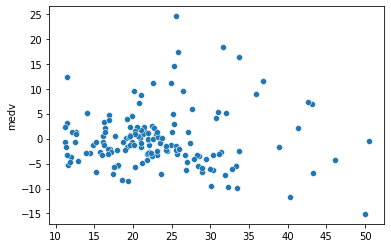

In [49]:
#ist assumption is cleard
#checking remaining assumption
#check linear relation between inputs(tv,radio) and output(sales)
#use some tricks
#Residual =(actual output-predicted output)
residual=y_test-y_pred
#print(residual)
#visualize scatterplot between y_pred and residual
#residual is denpend on y_pred
#input:residual
#output: y_pred
sb.scatterplot(y_pred,residual)
plt.show()

In [50]:
#to check correlation between y_pred ande residualwe are creating dataset df_new
dict={"y_pred":y_pred,"residual":residual}
df_new=pd.DataFrame(dict)
df_new.head()

,y_pred,residual
307,25.326386,2.873614
343,25.985574,-2.085574
47,16.132932,0.467068
67,24.396059,-2.396059
362,22.078983,-1.278983


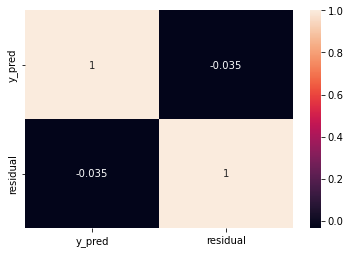

In [51]:
sb.heatmap(df_new.corr(),annot=True)
plt.show() 

1.22797728129864


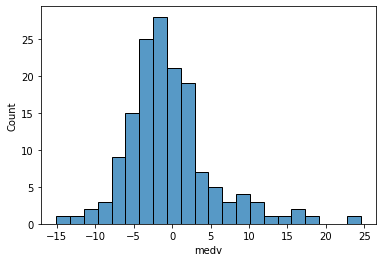

In [52]:
#3rd assumption : fail
#4th assumption :N.D. curve
sb.histplot(residual)
print(residual.skew())
plt.show()

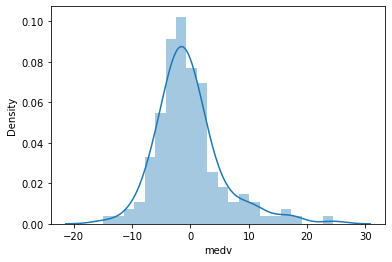

In [53]:
#displot
sb.distplot(residual)
plt.show()

In [54]:
residual.mean(),residual.median()

(-0.2935408067605654, -1.2715830619302722)

In [55]:
#we go for regularization